## Loading MNIST dataset
The MNIST dataset (a classic in the Machine Learning community) has been around almost as long as the field itself and has been intensively studied. 

It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 


In [1]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# Having a look at Training Data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# Having a look at Test Data
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [4]:
# Exemining one specific image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

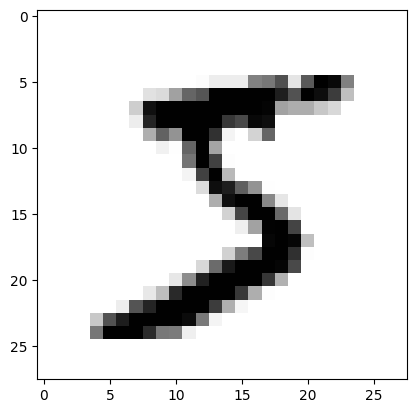

In [5]:
# Displaying the item from the training dataset
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
type(train_images[0])

numpy.ndarray

In [7]:
train_images[0].shape

(28, 28)

## Simple densely connected NN

In [8]:
# NN Architecture
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [9]:
# Compilation step
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [10]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 0.2675 - accuracy: 0.9221
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1072 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0713 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0382 - accuracy: 0.9891


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 361ms/step


array([2.1328370e-07, 1.2400448e-08, 5.7685105e-05, 1.2591596e-04,
       2.0625070e-10, 1.6846073e-08, 7.7361529e-12, 9.9981195e-01,
       8.8938023e-08, 4.1463618e-06], dtype=float32)

In [14]:
predictions[0].argmax() 

7

In [15]:
predictions[0][7] 

0.99981195

In [16]:
test_labels[0] 

7

In [17]:
# Evaluating the model on new (test) data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0643 - accuracy: 0.9805
test_acc: 0.9804999828338623


In [18]:
# To see the weights of a trained model, let's use the get_weights() method:
weights = model.get_weights()

# 'weights' is a list containing weight tensors
for layer_weights in weights:
    print(layer_weights)

[[-0.06763242  0.0526904   0.03603534 ... -0.05636118  0.06493108
   0.03957584]
 [ 0.04334639 -0.04525555 -0.06539775 ...  0.0438985   0.00935454
  -0.03087872]
 [-0.06380425  0.0379213  -0.00535713 ... -0.02421734  0.06361093
  -0.0417529 ]
 ...
 [ 0.03275394 -0.0478764  -0.020176   ...  0.0574317  -0.01276574
   0.01965071]
 [ 0.01492725 -0.01971659 -0.02033167 ...  0.046092   -0.03917704
  -0.0177963 ]
 [-0.02983022  0.00189253 -0.01090201 ... -0.05801511  0.01919405
  -0.00839086]]
[ 1.29439048e-02  4.50743549e-02 -8.38274485e-04  2.16187760e-02
  3.30999233e-02  5.79254180e-02  1.40648754e-03  8.62453580e-02
  2.63565294e-02  4.81463328e-04  5.76809980e-02  6.12516375e-03
 -5.45692630e-04 -4.56890650e-02  1.50027173e-02  4.46915366e-02
 -6.20708615e-02 -9.27757006e-03  1.84745360e-02  8.45212303e-03
  1.01701962e-02 -1.83059182e-02  8.13683420e-02  1.80063825e-02
 -3.29876132e-02 -2.05178978e-03  4.09530811e-02 -2.95591820e-02
 -3.05262730e-02  6.83049411e-02  3.22802141e-02 -2.2

In [19]:
len(weights)

4

In [20]:
for layer_weights in weights:
    print(layer_weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


## Initializing random weights and creating NN with those weights

In [21]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

input = 28*28
hidden = 512
output = 10

weights_1 = np.random.rand(input*hidden).reshape(input, hidden)
biases_1 = np.random.rand(hidden).reshape(hidden,)
weights_2 = np.random.rand(hidden*output).reshape(hidden, output)
biases_2 = np.random.rand(output).reshape(output,)

# Assuming you have a list of four lists, each representing a weight array
weights_list = [weights_1, biases_1, weights_2, biases_2]

# Print the shapes of the weight arrays (optional)
for weights in weights_list:
    print(weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


In [22]:
# Defining the architecture of a neural network (individual)
individual = keras.Sequential([
 layers.Dense(512, activation="relu", input_shape=(784,)),
 layers.Dense(10, activation="softmax")
])

# Setting the weights of the model 
individual.set_weights(weights_list)

# Compiling the model 
individual.compile(optimizer="rmsprop",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [23]:
individual.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Evaluating the model on train data
test_loss, test_acc = individual.evaluate(train_images, train_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 795.9622 - accuracy: 0.0904


In [25]:
# Evaluating the model on new (test) data
test_loss, test_acc = individual.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 805.0311 - accuracy: 0.0892
test_acc: 0.08919999748468399
